In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [2]:
class Data_Mine():
    
    def setup_E_hist(self):
        bins = np.arange(0,3,0.001)
        binc = (bins[:-1] + bins[1:]) / 2
        self.E_hist_bin   = bins
        self.E_hist_binc  = binc
        
        self.E_hist_all   = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_smr   = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_fid   = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_trk   = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo   = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_roi   = np.zeros(len(bins)-1, dtype='int32')
        
        self.E_hist_trk0  = np.zeros(len(bins)-1, dtype='int32') 
        self.E_hist_trk1  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_trk2  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo0  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo1  = np.zeros(len(bins)-1, dtype='int32')
        
        self.E_hist_blo0_smr  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo1_smr  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo0_fid  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo1_fid  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo0_trk  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo1_trk  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo0_blo  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo1_blo  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo0_roi  = np.zeros(len(bins)-1, dtype='int32')
        self.E_hist_blo1_roi  = np.zeros(len(bins)-1, dtype='int32')
        
        
        
    def setup_L_hist(self):
        bins = np.arange(0,500,1)
        binc = (bins[:-1] + bins[1:]) / 2
        self.L_hist_bin   = bins
        self.L_hist_binc  = binc
        
        self.L_hist_trk0  = np.zeros(len(bins)-1, dtype='int32') 
        self.L_hist_trk1  = np.zeros(len(bins)-1, dtype='int32')
        self.L_hist_trk2  = np.zeros(len(bins)-1, dtype='int32')
        self.L_hist_Ntrk  = np.zeros(len(bins)-1, dtype='int32')
        
    def setup_2d(self):
        binss = np.arange(0,3,0.01)
        bins = [binss,binss]
        
        self.bins_2d = bins
        self.hist_2d = np.zeros(shape=(len(binss)-1,len(binss)-1))
        
    def setup_vol(self):
        binsR = np.arange(0,1301,10)
        binsZ = np.arange(-1301,1301,10)
        bins = [binsR,binsZ]

        self.Vbins_2d = bins
        self.Vhist_2d = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))
        
        

In [3]:
SIG  = np.load("Inputs/bb0nu_hist_5_3.npy").item()
binc = SIG.E_hist_binc

Bi214 = np.load("Inputs/Bi214_hist_5_3.npy").item()
Tl208 = np.load("Inputs/Tl208_hist_5_3.npy").item()
Xe137 = np.load("Inputs/Xe137_hist_5_3.npy").item()
bb2nu = np.load("Inputs/bb2nu_hist_5_3.npy").item()


In [13]:
sum(Xe137.E_hist_roi)

1076

In [15]:
SIG  = np.load("Inputs/bb0nu_hist.npy").item()
binc = SIG.E_hist_binc

Bi214 = np.load("Inputs/Bi214_hist_7_10.npy").item()
Tl208 = np.load("Inputs/Tl208_hist_7_10.npy").item()
Xe137 = np.load("Inputs/Xe137_hist_7_10.npy").item()
bb2nu = np.load("Inputs/bb2nu_hist.npy").item()


In [4]:
BACK = Data_Mine()
BACK.setup_E_hist()
BACK.setup_L_hist()
BACK.setup_2d()

BACK.hist_2d +=Bi214.hist_2d
BACK.hist_2d +=Tl208.hist_2d
BACK.hist_2d +=Xe137.hist_2d
BACK.hist_2d +=bb2nu.hist_2d

BACK.E_hist_blo0 +=Bi214.E_hist_blo0
BACK.E_hist_blo0 +=Tl208.E_hist_blo0
BACK.E_hist_blo0 +=Xe137.E_hist_blo0
BACK.E_hist_blo0 +=bb2nu.E_hist_blo0

BACK.E_hist_blo1 +=Bi214.E_hist_blo1
BACK.E_hist_blo1 +=Tl208.E_hist_blo1
BACK.E_hist_blo1 +=Xe137.E_hist_blo1
BACK.E_hist_blo1 +=bb2nu.E_hist_blo1

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


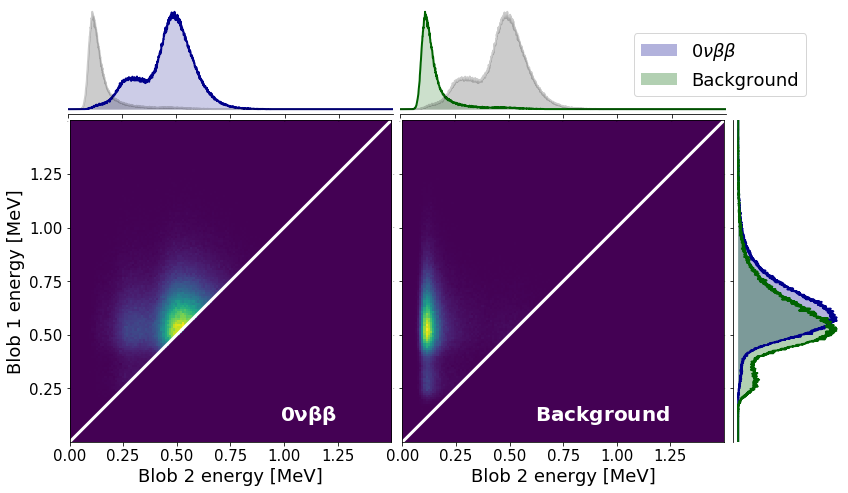

In [21]:


fig5 = plt.figure(constrained_layout=False,figsize=(25,8))
widths  = [3, 3, 1]
heights = [1, 3]
spec5 = fig5.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights,
                         left=0.05, right=0.48, wspace=0.03, hspace=0.03)

axhist2done = fig5.add_subplot(spec5[1, 0])
axhist2dtwo = fig5.add_subplot(spec5[1, 1], sharey = axhist2done)
axhistxone  = fig5.add_subplot(spec5[0, 0], sharex = axhist2done)
axhistxtwo  = fig5.add_subplot(spec5[0, 1], sharex = axhist2dtwo, sharey = axhistxone)
axhistyboth = fig5.add_subplot(spec5[1, 2], sharey = axhist2done)


extent = [0, 2.99, 0, 2.99]
lin = np.arange(0,3,0.1)
axhist2done.imshow(SIG.hist_2d.T,origin='lower', extent=extent)
axhist2done.plot(lin,lin,lw=3,color='w')

axhist2dtwo.imshow(BACK.hist_2d.T,origin='lower', extent=extent)
axhist2dtwo.plot(lin,lin,lw=3,color='w')



axhistxone.plot(binc,SIG.E_hist_blo1/max(SIG.E_hist_blo1),lw=2,color="darkblue")
axhistxone.fill_between(binc,SIG.E_hist_blo1/max(SIG.E_hist_blo1),lw=0,color="darkblue",alpha=0.2,label=r'$0\nu\beta\beta$')

axhistxone.plot(binc,BACK.E_hist_blo1/max(BACK.E_hist_blo1),lw=2,color="k",alpha=0.2)
axhistxone.fill_between(binc,BACK.E_hist_blo1/max(BACK.E_hist_blo1),lw=0,color="k",alpha=0.2)




axhistxtwo.plot(binc,BACK.E_hist_blo1/max(BACK.E_hist_blo1),lw=2,color="darkgreen")
axhistxtwo.fill_between(binc,BACK.E_hist_blo1/max(BACK.E_hist_blo1),lw=0,color="darkgreen",alpha=0.2,label=r'Backgrounds')

axhistxtwo.plot(binc,SIG.E_hist_blo1/max(SIG.E_hist_blo1),lw=2,color="k",alpha=0.2)
axhistxtwo.fill_between(binc,SIG.E_hist_blo1/max(SIG.E_hist_blo1),lw=0,color="k",alpha=0.2)




axhistyboth.plot(SIG.E_hist_blo0/max(SIG.E_hist_blo0),binc,lw=2,color="darkblue")
axhistyboth.fill_between(SIG.E_hist_blo0/max(SIG.E_hist_blo0),binc,lw=0,color="darkblue",alpha=0.3,label=r'$0\nu\beta\beta$')

axhistyboth.plot(BACK.E_hist_blo0/max(BACK.E_hist_blo0),binc,lw=2,color="darkgreen")
axhistyboth.fill_between(BACK.E_hist_blo0/max(BACK.E_hist_blo0),binc,lw=0,color="darkgreen",alpha=0.3,label=r'Background')

axhistyboth.legend(loc='upper left', bbox_to_anchor=(-1, 1.3), fontsize=18)

# settint the axis up
axhist2done.set_xlim(0,1.499)
axhist2done.set_ylim(0.001,1.5)
axhist2dtwo.set_xlim(0,1.499)

axhistxone.spines['top'].set_visible(False)
axhistxone.spines['right'].set_visible(False)
axhistxone.spines['left'].set_visible(False)
axhistxone.get_yaxis().set_ticks([])
axhistxone.tick_params(labelsize=0)

axhistxtwo.spines['top'].set_visible(False)
axhistxtwo.spines['right'].set_visible(False)
axhistxtwo.spines['left'].set_visible(False)
axhistxtwo.tick_params(labelsize=0)

axhistyboth.spines['top'].set_visible(False)
axhistyboth.spines['right'].set_visible(False)
axhistyboth.spines['bottom'].set_visible(False)
axhistyboth.get_xaxis().set_ticks([])
axhistyboth.tick_params(labelsize=0)


axhist2done.get_xaxis().set_ticks([0,0.25,0.5,0.75,1,1.25])
axhist2dtwo.get_xaxis().set_ticks([0,0.25,0.5,0.75,1,1.25])
axhist2done.get_yaxis().set_ticks([0.25,0.5,0.75,1,1.25])
axhist2dtwo.tick_params(axis='y',labelsize=0)
axhist2dtwo.tick_params(axis='x',labelsize=15)
axhist2done.tick_params(labelsize=15)

#axhist2done.grid()
#axhist2dtwo.grid(lw=2,color='w')


axhist2done.set_ylabel("Blob 1 energy [MeV]",fontsize=18)
axhist2done.set_xlabel("Blob 2 energy [MeV]",fontsize=18)
axhist2dtwo.set_xlabel("Blob 2 energy [MeV]",fontsize=18)

axhist2done.text(1.25,0.1,r'${\bf 0\nu\beta\beta}$', fontsize=20,color='w',ha='right')
axhist2dtwo.text(1.25,0.1,r'${\bf Background}$', fontsize=20,color='w',ha='right')

plt.tight_layout()
#plt.savefig("BLOB_COMP.png",bbox_inches='tight',dpi=400)
#plt.savefig("BLOB_COMP.pdf",bbox_inches='tight')

plt.show()



In [6]:
# set activitys
ActivityBi214 = 38250*1.260e-6 + 469*22.7e-6 + 10.6*578.5e-6
#print(ActivityBi214)
ActivityTl208 = 38250*0.435e-6 + 469*8.23e-6 + 10.6*85.9e-6
#print(ActivityTl208)
ActivityXe137 = 3.595e-06
ActivityRn222 = 9.270e-02
N_Xe137 = (1109e3/136)*6.022e23
Thalf   = 1e27
ActivityXe136 = np.log(2)*N_Xe137/Thalf/3.16e7


factBi214 = 1e6*ActivityBi214/(1000000000+1000000000+9996000000)/1.109
factTl208 = 1e6*ActivityTl208/(1000000000+900000000+900000000)/1.109
factXe137 = 1e6*ActivityXe137/(19000000)/1.109
factbb0nu = 1e6*ActivityXe136/(1205000)/1.109


In [7]:
BACK.E_hist_fid = BACK.E_hist_fid.astype('float64')
BACK.E_hist_trk = BACK.E_hist_trk.astype('float64')
BACK.E_hist_blo = BACK.E_hist_blo.astype('float64')
BACK.E_hist_roi = BACK.E_hist_roi.astype('float64')

In [8]:

BACK.E_hist_fid +=Bi214.E_hist_fid.astype('float64')*factBi214
BACK.E_hist_fid +=Tl208.E_hist_fid.astype('float64')*factTl208
BACK.E_hist_fid +=Xe137.E_hist_fid.astype('float64')*factXe137

BACK.E_hist_trk +=Bi214.E_hist_trk.astype('float64')*factBi214
BACK.E_hist_trk +=Tl208.E_hist_trk.astype('float64')*factTl208
BACK.E_hist_trk +=Xe137.E_hist_trk.astype('float64')*factXe137

BACK.E_hist_blo +=Bi214.E_hist_blo.astype('float64')*factBi214
BACK.E_hist_blo +=Tl208.E_hist_blo.astype('float64')*factTl208
BACK.E_hist_blo +=Xe137.E_hist_blo.astype('float64')*factXe137

BACK.E_hist_roi +=Bi214.E_hist_roi.astype('float64')*factBi214
BACK.E_hist_roi +=Tl208.E_hist_roi.astype('float64')*factTl208
BACK.E_hist_roi +=Xe137.E_hist_roi.astype('float64')*factXe137

BACK.L_hist_Ntrk +=Bi214.L_hist_Ntrk
BACK.L_hist_Ntrk +=Tl208.L_hist_Ntrk
BACK.L_hist_Ntrk +=Xe137.L_hist_Ntrk


/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


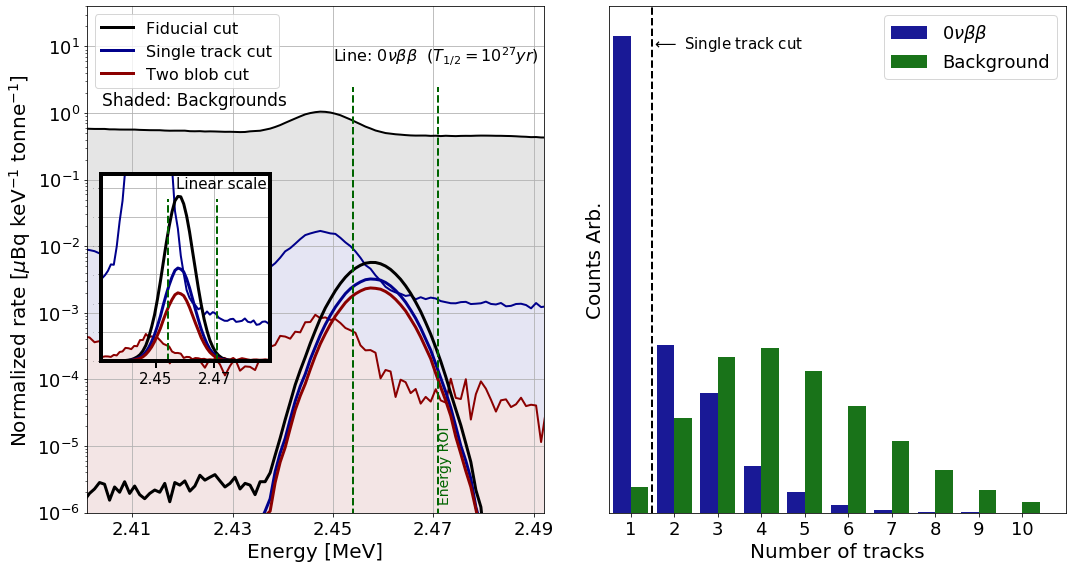

In [20]:
#config_vars['roi_emin']      = 2.454
#config_vars['roi_emax']      = 2.471

fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(121)



ax1.plot(binc,BACK.E_hist_fid,lw=2, color='k')
ax1.plot(binc,BACK.E_hist_trk,lw=2, color='darkblue')
ax1.plot(binc,BACK.E_hist_blo,lw=2, color='darkred')

ax1.fill_between(binc,BACK.E_hist_fid,BACK.E_hist_trk,lw=0, color='k',alpha=0.1)
ax1.fill_between(binc,BACK.E_hist_trk,BACK.E_hist_blo,lw=0, color='darkblue',alpha=0.1)
ax1.fill_between(binc,BACK.E_hist_blo,lw=0, color='darkred',alpha=0.1)

ax1.plot(binc,SIG.E_hist_fid.astype('float64')*factbb0nu,lw=3, label="Fiducial cut", color='k')
ax1.plot(binc,SIG.E_hist_trk.astype('float64')*factbb0nu,lw=3, label="Single track cut", color='darkblue')
ax1.plot(binc,SIG.E_hist_blo.astype('float64')*factbb0nu,lw=3, label="Two blob cut", color='darkred')


a = [2.454, 2.454]
b = [0,2.5]
ax1.plot(a,b,lw=2,linestyle='--',color='darkgreen')
a = [2.471, 2.471]
ax1.plot(a,b,lw=2,linestyle='--',color='darkgreen')
ax1.text(2.471,1.5e-6,r'Energy ROI', fontsize=14,color='darkgreen',ha='left',rotation=90)

#text = 'Shaded: Backgrounds'
#ax1.text(2.45,18,text, fontsize=16,color='k',ha='left')
text = r'Line: ${0\nu\beta\beta}$  ($T_{1/2} = 10^{27} yr$) '
ax1.text(2.45,6,text, fontsize=16,color='k',ha='left')

text = 'Shaded: Backgrounds'
ax1.text(2.404,1.3,text, fontsize=17,color='k',ha='left')



ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(2.401,2.492)
ax1.set_ylim(9.9e-7,40)

ax1.semilogy()
ax1.set_xticks([2.41, 2.43, 2.45, 2.47, 2.49])

ax1.legend(loc='upper left',fontsize=16)
#ax1.set_ylabel(r"Activity normalized rate [$\mu$Bq keV$^{-1}$ tonne$^{-1}$]",fontsize=20)
ax1.set_ylabel(r"Normalized rate [$\mu$Bq keV$^{-1}$ tonne$^{-1}$]",fontsize=20)
ax1.set_xlabel("Energy [MeV]",fontsize=20)
ax1.tick_params(labelsize=18)
ax1.grid()



axin = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.03,0.3,0.37,0.37])
axin.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
axin.plot(binc,BACK.E_hist_fid*1000,lw=1, color='k')
axin.plot(binc,BACK.E_hist_trk*1000,lw=2, color='darkblue')
axin.plot(binc,BACK.E_hist_blo*1000,lw=2, color='darkred')

#axin.fill_between(binc,BACK.E_hist_fid*1000,BACK.E_hist_trk*1000,lw=0, color='k',alpha=0.1)
#axin.fill_between(binc,BACK.E_hist_trk*1000,BACK.E_hist_blo*1000,lw=0, color='darkblue',alpha=0.1)
axin.fill_between(binc,BACK.E_hist_blo*1000,lw=0, color='darkred',alpha=0.1)

axin.plot(binc,SIG.E_hist_fid.astype('float64')*factbb0nu*1000,lw=3, label="Fiducial cut", color='k')
axin.plot(binc,SIG.E_hist_trk.astype('float64')*factbb0nu*1000,lw=3, label="Single track cut", color='darkblue')
axin.plot(binc,SIG.E_hist_blo.astype('float64')*factbb0nu*1000,lw=3, label="Two blob cut", color='darkred')
a = [2.454, 2.454]
b = [0,5.6]
axin.plot(a,b,lw=2,linestyle='--',color='darkgreen')
a = [2.471, 2.471]
axin.plot(a,b,lw=2,linestyle='--',color='darkgreen')

#mark_inset(ax1, axin, loc1=1, loc2=4)
axin.set_xticks([2.45,2.47])
axin.set_xlim(2.431,2.489)
axin.set_ylim(0,6.5)
axin.tick_params(axis='y',labelsize=0)
axin.tick_params(axis='x',labelsize=15,length=7,width=2)
axin.spines["top"].set_linewidth(4)
axin.spines["bottom"].set_linewidth(4)
axin.spines["left"].set_linewidth(4)
axin.spines["right"].set_linewidth(4)
axin.patch.set_facecolor('w')
axin.patch.set_alpha(1)
axin.grid()
text = r'Linear scale'
axin.text(2.457, 5.98 ,text, fontsize=15,color='k',ha='left')

ax2 = fig.add_subplot(122)

width = 0.4
ax2.bar(SIG.L_hist_binc-0.5-width/2, SIG.L_hist_Ntrk/sum(SIG.L_hist_Ntrk),width=width,color='darkblue'
             ,alpha=0.9,label=r'$0\nu\beta\beta$')
ax2.bar(SIG.L_hist_binc-0.5+width/2, BACK.L_hist_Ntrk/sum(BACK.L_hist_Ntrk),width=width,color='darkgreen'
             ,alpha=0.9,label=r'Background')

ax2.legend(loc="upper right", fontsize=18)
ax2.axvline(1.5, lw=2, color='k', linestyle='--')
ax2.set_xticks(np.arange(0,11,1))
ax2.set_yticks([])


text = r'$\longleftarrow$ Single track cut'
ax2.text(1.5,0.55,text, fontsize=15,color='k',ha='left')

ax2.set_xlim(0.5,11)
ax2.set_ylim(0,0.6)
ax2.set_xlabel("Number of tracks",fontsize=20)
ax2.set_ylabel("Counts Arb.",fontsize=20)
ax2.tick_params(labelsize=18)


plt.tight_layout()
#plt.savefig("Energy_Track_Cuts.png",bbox_inches='tight',dpi=400)
#plt.savefig("Energy_Track_Cuts.pdf",bbox_inches='tight')

plt.show()


In [10]:
#3.154e7 per year
def Mass_BiTl(Mass_Bi214,Mass_Tl208):
    
    Bi_fact   = 3.154e7*ActivityBi214
    Bi_tot    = 1000000000+1000000000+9996000000
    Bi_tot_er = np.sqrt(Bi_tot)

    Tl_fact   = 3.154e7*ActivityTl208
    Tl_tot    = 1000000000+900000000+900000000
    Tl_tot_er = np.sqrt(Tl_tot)

    Bi_num    = Bi_fact*Mass_Bi214/Bi_tot
    Bi_num_er = Bi_num*np.sqrt((Mass_Bi214/Mass_Bi214**2) + (Bi_tot/Bi_tot**2))

    Tl_num    = Tl_fact*Mass_Tl208/Tl_tot
    Tl_num_er = Tl_num*np.sqrt((Mass_Tl208/Mass_Tl208**2) + (Tl_tot/Tl_tot**2))

    tot    = Bi_num + Tl_num
    tot_er = np.sqrt(Bi_num_er**2 + Tl_num_er**2)
    return tot, tot_er

def Mass_bb(Mass_bb0nu):
    bb_fact   = 3.154e7*ActivityXe136
    bb_tot    = 1205000
    bb_tot_er = np.sqrt(bb_tot)

    tot    = bb_fact*Mass_bb0nu/bb_tot
    tot_er = tot*np.sqrt((Mass_bb0nu/Mass_bb0nu**2) + (bb_tot/bb_tot**2))

    return tot, tot_er

In [11]:
Mass_bb0nu = np.load("Inputs/Mass_bb0nu_hist_7_10.npy").item()
Mass_Bi214 = np.load("Inputs/Mass_Bi214_hist_7_10.npy").item()
Mass_Tl208 = np.load("Inputs/Mass_Tl208_hist_7_10.npy").item()


Mass_bb0nu = np.load("Inputs/Mass_bb0nu_hist_5_3.npy").item()
Mass_Bi214 = np.load("Inputs/Mass_Bi214_hist_5_3.npy").item()
Mass_Tl208 = np.load("Inputs/Mass_Tl208_hist_5_3.npy").item()




/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


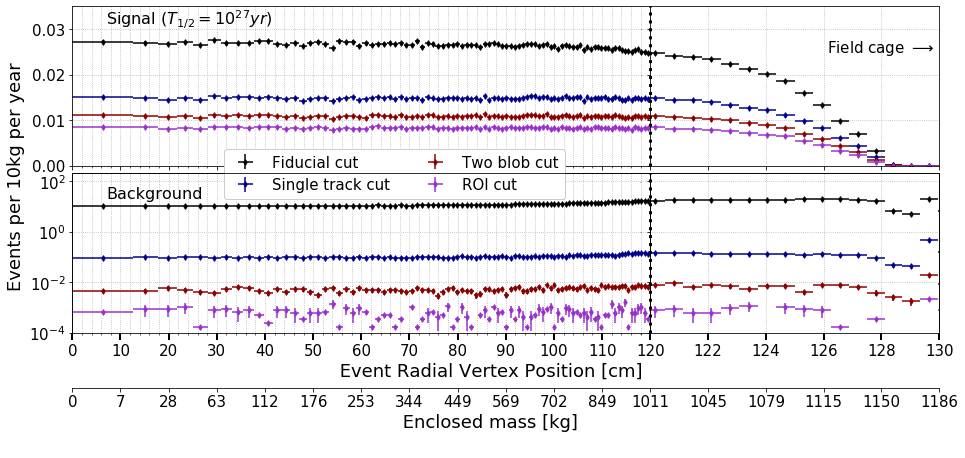

In [15]:
#OK so yes, multiply by R then bin should be R * event rate [arb* m]
#In equal mass bins it can be
#Evts per 10kg per year

rho = 85.95*1e-9 #kg/mm**3
L = 2600

fig5 = plt.figure(constrained_layout=False,figsize=(28,6))
widths  = [2, 1]
heights = [1,1]
spec5 = fig5.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights,
                         left=0.05, right=0.48, wspace=0.00, hspace=0.05)

ax1 = fig5.add_subplot(spec5[0, 0])
ax2 = fig5.add_subplot(spec5[0, 1],sharey=ax1)
ax3 = fig5.add_subplot(spec5[1, 0],sharex=ax1)
ax4 = fig5.add_subplot(spec5[1, 1],sharey=ax3,sharex=ax2)

xx = Mass_bb0nu.R_hist_binc/10.0
xer = (Mass_bb0nu.R_hist_bin[1:]-Mass_bb0nu.R_hist_bin[:-1])/2/10.0

yy, yyer = Mass_bb(Mass_bb0nu.R_hist_fid)
ax1.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='k')
ax2.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='k')

yy, yyer = Mass_bb(Mass_bb0nu.R_hist_trk)
ax1.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='darkblue')
ax2.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='darkblue')

yy, yyer = Mass_bb(Mass_bb0nu.R_hist_blo)
ax1.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='darkred')
ax2.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='darkred')

yy, yyer = Mass_bb(Mass_bb0nu.R_hist_roi)
ax1.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='darkorchid')
ax2.errorbar(xx,yy, yerr=yyer,xerr=xer,linestyle=' ',marker='d',ms=4,color='darkorchid')



yy, yyer = Mass_BiTl(Mass_Bi214.R_hist_fid, Mass_Tl208.R_hist_fid)
ax3.errorbar(xx,yy, yerr=yyer,xerr=xer,label='Fiducial cut',linestyle=' ',marker='d',ms=4,color='k')
ax4.errorbar(xx,yy, yerr=yyer,xerr=xer,label='fid',linestyle=' ',marker='d',ms=4,color='k')

yy, yyer = Mass_BiTl(Mass_Bi214.R_hist_trk, Mass_Tl208.R_hist_trk)
ax3.errorbar(xx,yy, yerr=yyer,xerr=xer,label='Single track cut',linestyle=' ',marker='d',ms=4,color='darkblue')
ax4.errorbar(xx,yy, yerr=yyer,xerr=xer,label='trk',linestyle=' ',marker='d',ms=4,color='darkblue')

yy, yyer = Mass_BiTl(Mass_Bi214.R_hist_blo, Mass_Tl208.R_hist_blo)
ax3.errorbar(xx,yy, yerr=yyer,xerr=xer,label='Two blob cut',linestyle=' ',marker='d',ms=4,color='darkred')
ax4.errorbar(xx,yy, yerr=yyer,xerr=xer,label='blo',linestyle=' ',marker='d',ms=4,color='darkred')

yy, yyer = Mass_BiTl(Mass_Bi214.R_hist_roi, Mass_Tl208.R_hist_roi)
ax3.errorbar(xx,yy, yerr=yyer,xerr=xer,label='ROI cut',linestyle=' ',marker='d',ms=4,color='darkorchid')
ax4.errorbar(xx,yy, yerr=yyer,xerr=xer,label='roi',linestyle=' ',marker='d',ms=4,color='darkorchid')

ax3.legend(loc='upper left',bbox_to_anchor=(0.25, 1.2), fontsize=15,ncol=2,facecolor='white', framealpha=1)
ax3.semilogy()

# kil spines where they touch
#ax3.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax1.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)



ax1.tick_params(axis='y',which='both',labelsize=15)
ax1.tick_params(axis='x',labelsize=0)
ax2.tick_params(axis='y',which='both',labelsize=0)
ax2.tick_params(axis='x',labelsize=0)
ax3.tick_params(axis='y',labelsize=15)
ax3.tick_params(axis='x',labelsize=15)
ax4.tick_params(axis='y',which='both',labelsize=0)
ax4.tick_params(axis='x',labelsize=15)


ax1.axvline(1200/10.0,lw=3,color='k',linestyle=':')
ax3.axvline(1200/10.0,lw=3,color='k',linestyle=':')
ax2.axvline(1200/10.0,lw=3,color='k',linestyle=':')
ax4.axvline(1200/10.0,lw=3,color='k',linestyle=':')


ax1.set_xlim(0,1200/10.0)
ax2.set_xlim(1201/10.0,1300/10.0)

ax1.grid(which='both',linestyle=':')
ax2.grid(which='both',linestyle=':')
ax3.grid(which='both',linestyle=':')
ax4.grid(which='both',linestyle=':')


# how the pain of the ticks
x_big_min = np.arange(0/10.0,1200/10.0,20/10.0)
x_big_maj = np.arange(0/10.0,1200/10.0,100/10.0)
x_sma_min = np.arange(1200/10.0,1301/10.0,10/10.0)
x_sma_maj = np.arange(1200/10.0,1301/10.0,20/10.0)


ax1.set_xticks(x_big_maj)
ax1.set_xticks(x_big_min,minor=True)
ax3.tick_params(axis='x',labelsize=15,length=7,width=2)

ax2.set_xticks(x_sma_maj)
ax4.set_xticks(x_sma_maj)
ax2.set_xticks(x_sma_maj,minor=True)
ax4.tick_params(axis='x',labelsize=15,length=7,width=2)


ax3.set_xlabel("                                             Event Radial Vertex Position [cm]",fontsize=18)
ax3.set_ylabel("                            Events per 10kg per year ",fontsize=18)

axD1 = ax3.twiny()
newpos = np.pi*((10.0*x_big_maj)**2)*L*rho#*0.9026
newpos = newpos.round(0).astype('int32')
axD1.set_xticks(x_big_maj)
axD1.set_xticklabels(newpos)
axD1.tick_params(axis='x',labelsize=15)

axD1.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
axD1.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axD1.spines['bottom'].set_position(('outward', 55))
axD1.set_xlabel('                                             Enclosed mass [kg]',fontsize=18)
axD1.set_xlim(ax3.get_xlim())


axD2 = ax4.twiny()
newpos = np.pi*((10.0*x_sma_maj)**2)*L*rho#*0.9026
newpos = newpos.round(0).astype('int32')
axD2.set_xticks(x_sma_maj)
axD2.set_xticklabels(newpos)
axD2.tick_params(axis='x',labelsize=15)

axD2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
axD2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axD2.spines['bottom'].set_position(('outward', 55))
axD2.set_xlim(ax4.get_xlim())


ax1.set_ylim(0,0.035)
ax3.set_ylim(1e-4,199)

text = r'Field cage $\longrightarrow$'
ax2.text(126.1, 0.025 ,text, fontsize=15,color='k',ha='left')

text = r'Signal ($T_{1/2} = 10^{27} yr$)'
ax1.text(7.0, 0.031 ,text, fontsize=16,color='k',ha='left')

text = r'Background'
ax3.text(7.0, 20 ,text, fontsize=16,color='k',ha='left')

plt.tight_layout()
#plt.savefig("Radial_Cuts.png",bbox_inches='tight',dpi=400)
#plt.savefig("Radial_Cuts.pdf",bbox_inches='tight')
plt.show()